In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#generating dataset
r = np.random.rand(10000)*3
theta = np.random.rand(10000)*2*np.pi
y=r.astype(int)
r=r*(np.cos(theta)+1)
x1=r*np.cos(theta)
x2=r*np.sin(theta)
X=np.array([x1, x2]).T

In [51]:
#split dataset
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

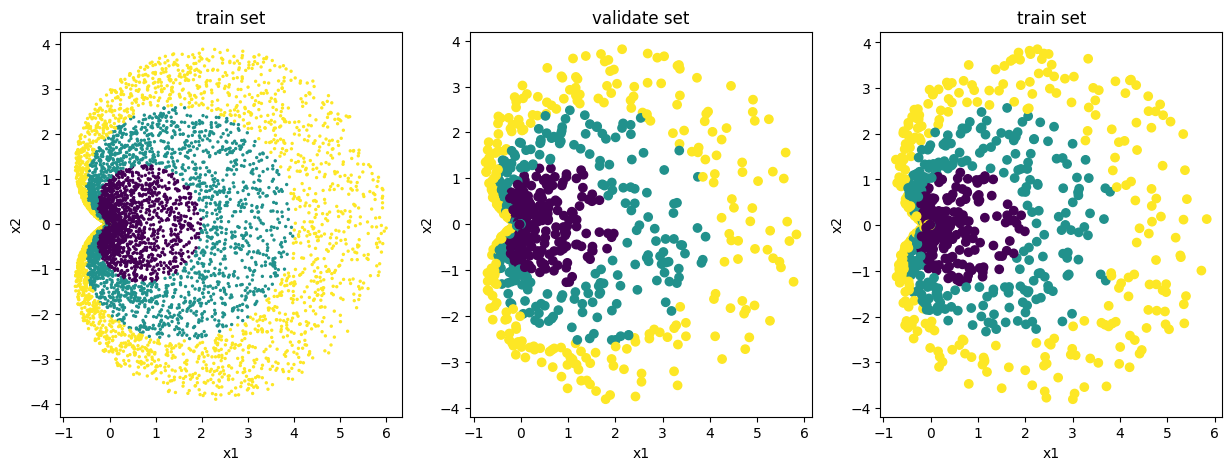

In [52]:
#visualize dataset
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('train set')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('validate set')

ax1 = fig.add_subplot(1, 3, 3)
ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('train set')

plt.show()

In [53]:
#Hypothesis Define (Model Define)
import torch
import torch.nn as nn
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)
    def forward(self, x):
        return self.linear(x)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [54]:
#cost function define
cls_loss = nn.CrossEntropyLoss()

test_pred_y = torch.Tensor([[2,0.1],[0,1]])
test_true_y1 = torch.Tensor([1,0]).long()
test_true_y2 = torch.Tensor([0,1]).long()

print(cls_loss(test_pred_y, test_true_y1))
print(cls_loss(test_pred_y, test_true_y2))


tensor(1.6763)
tensor(0.2263)


1203 parameters


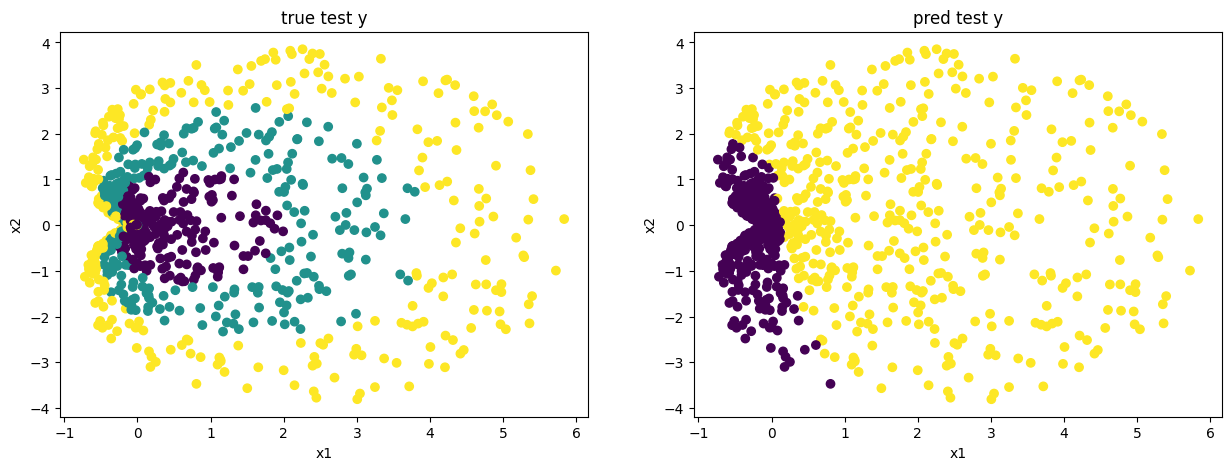

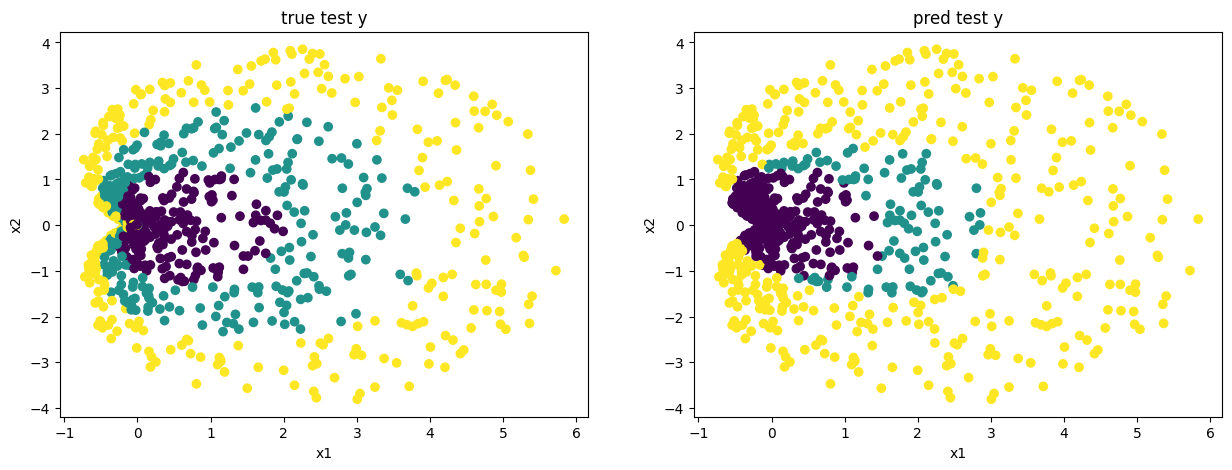

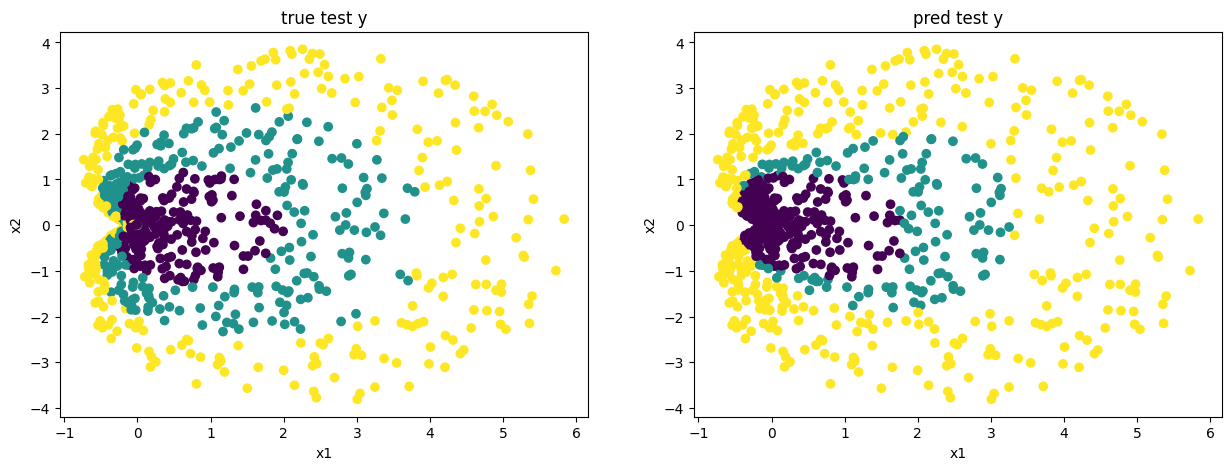

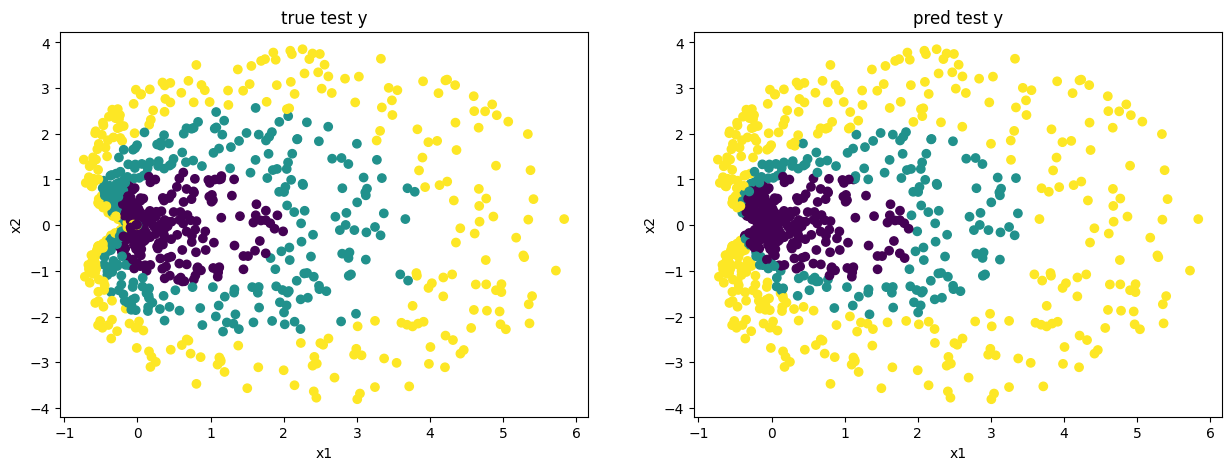

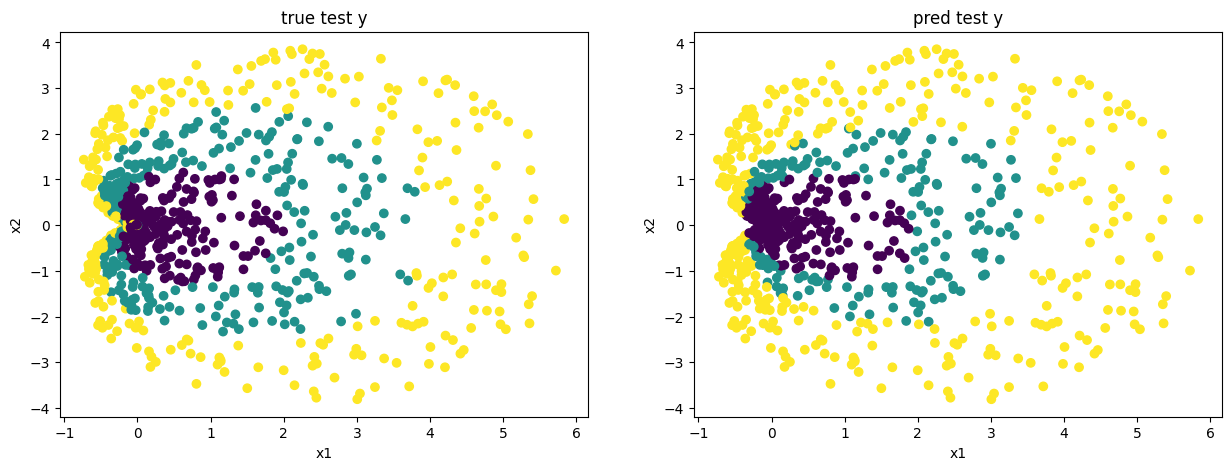

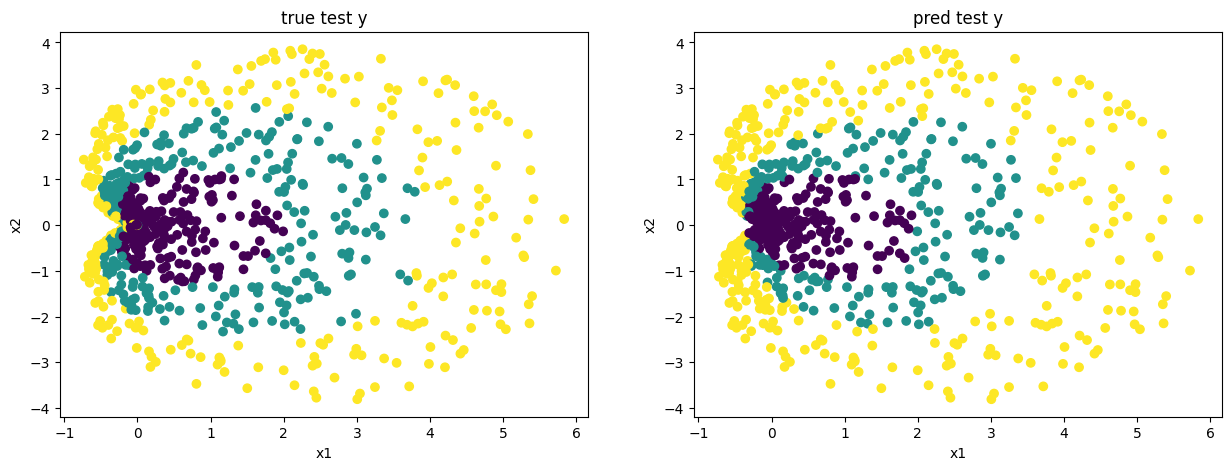

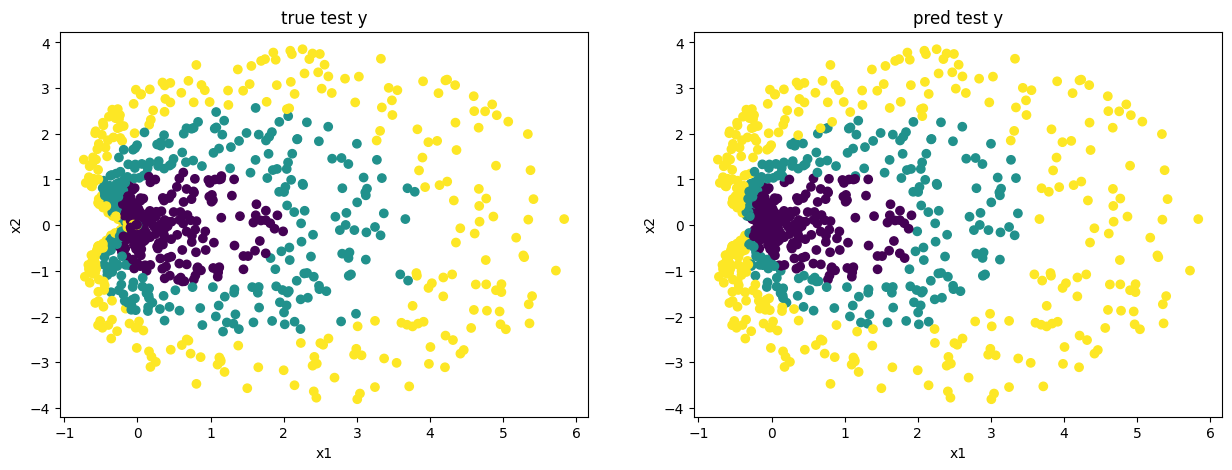

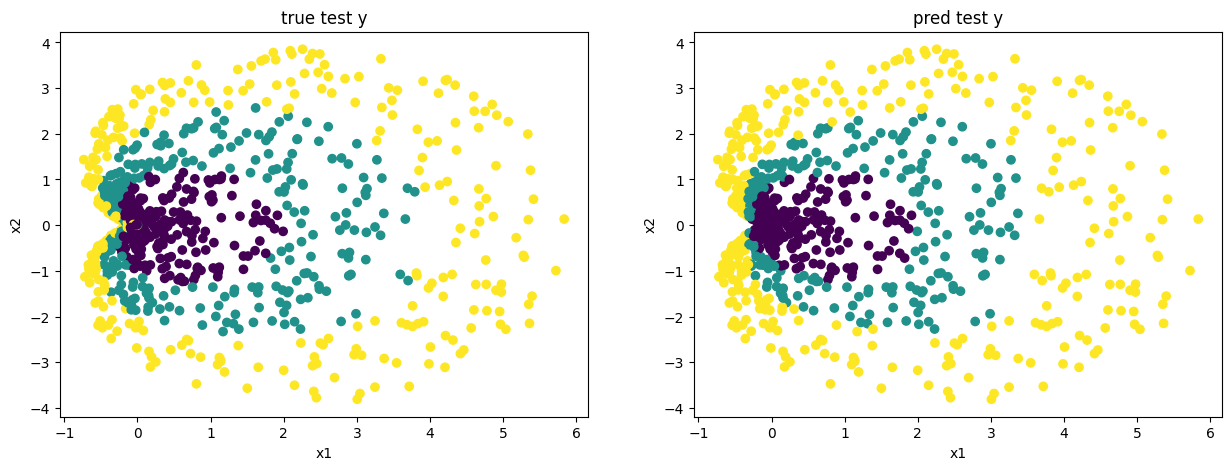

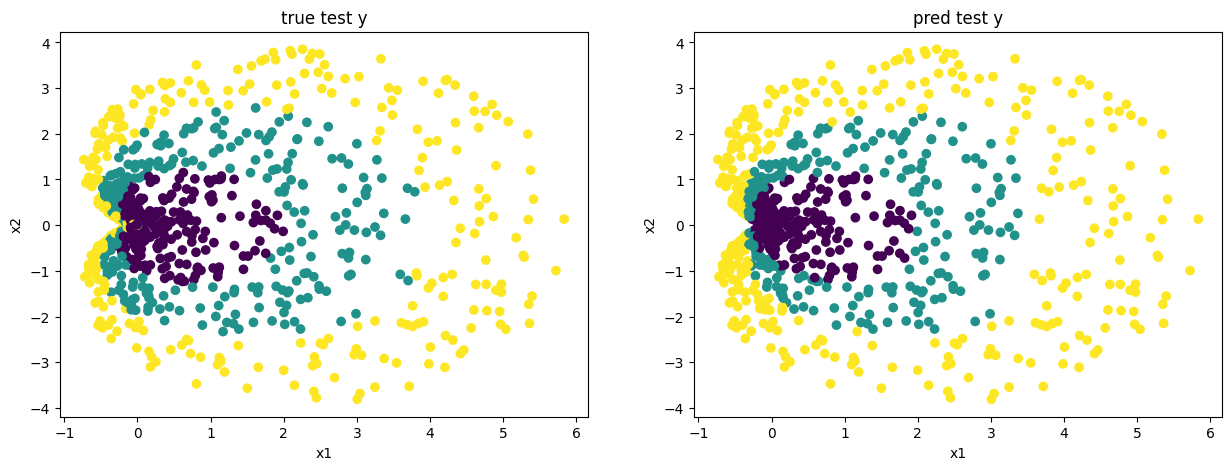

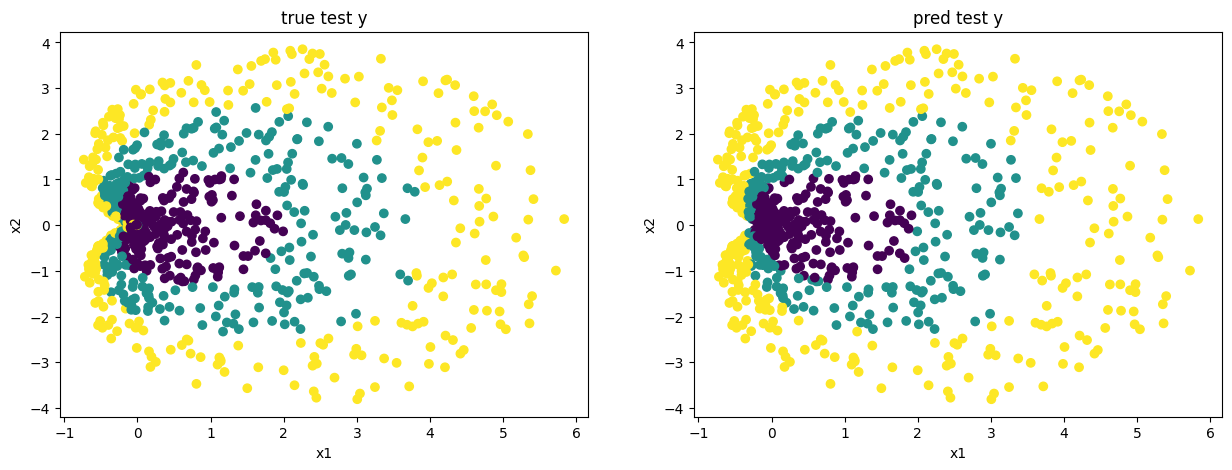

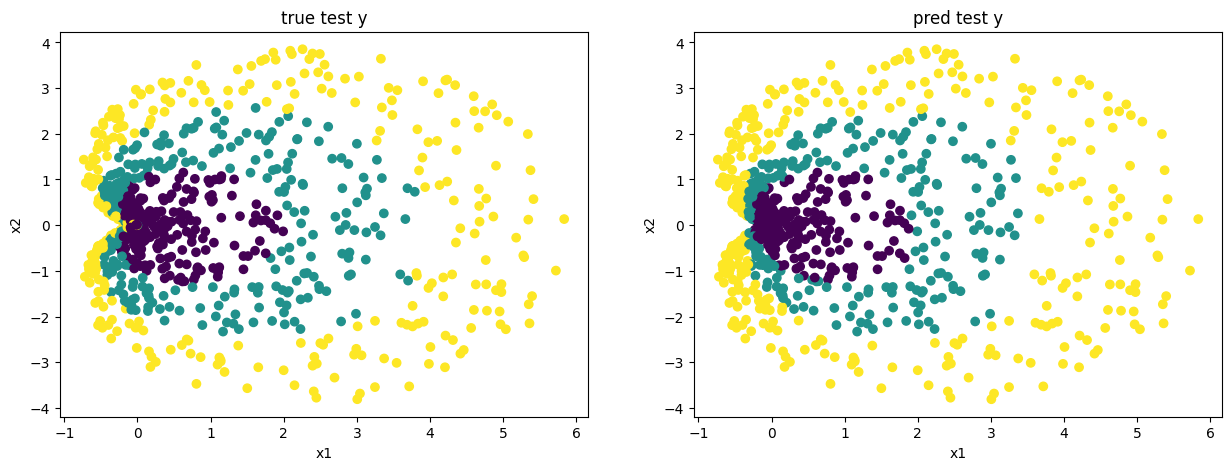

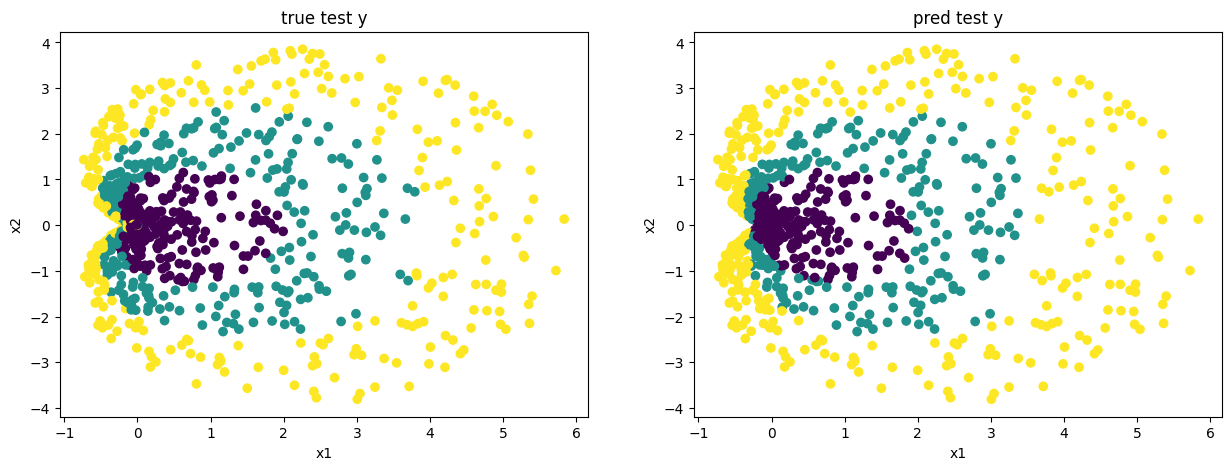

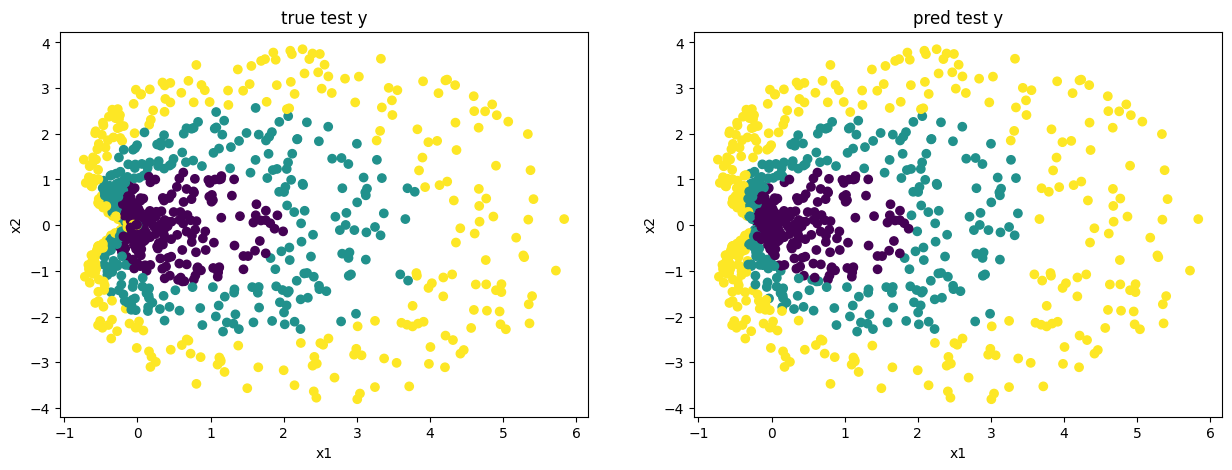

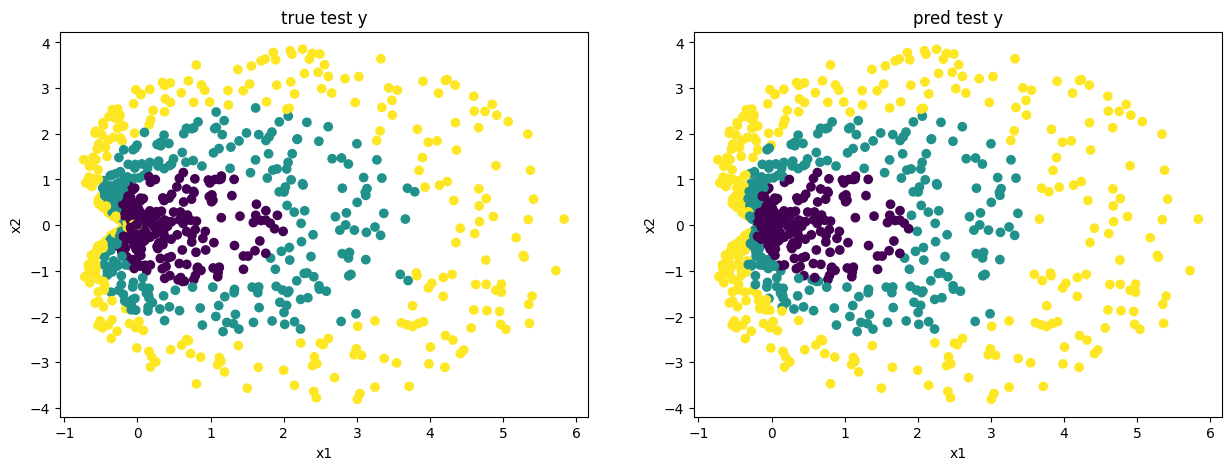

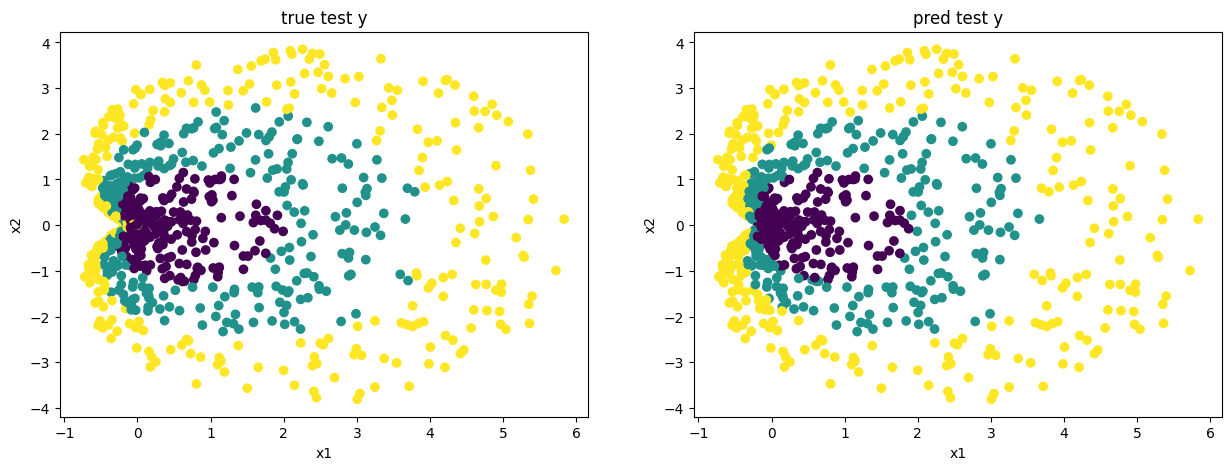

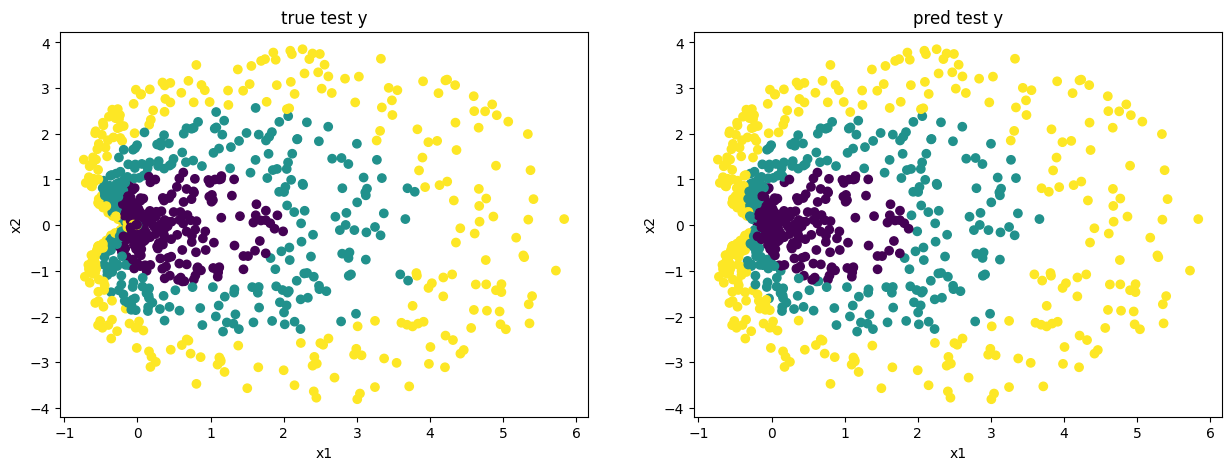

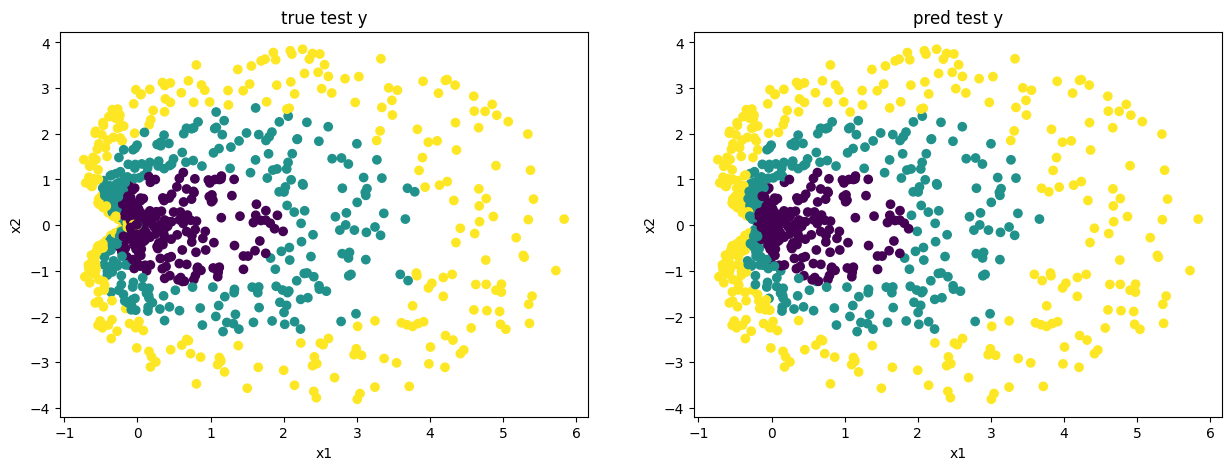

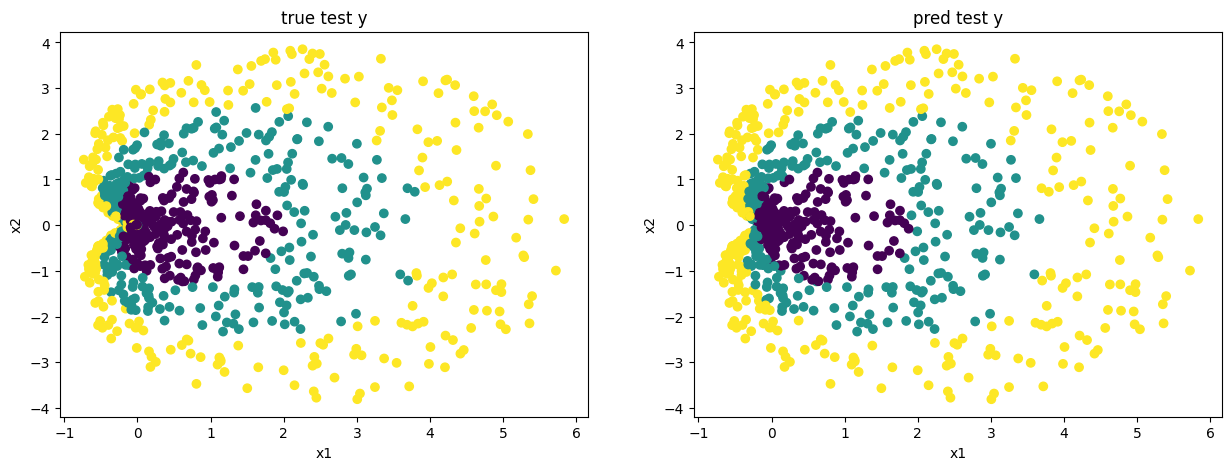

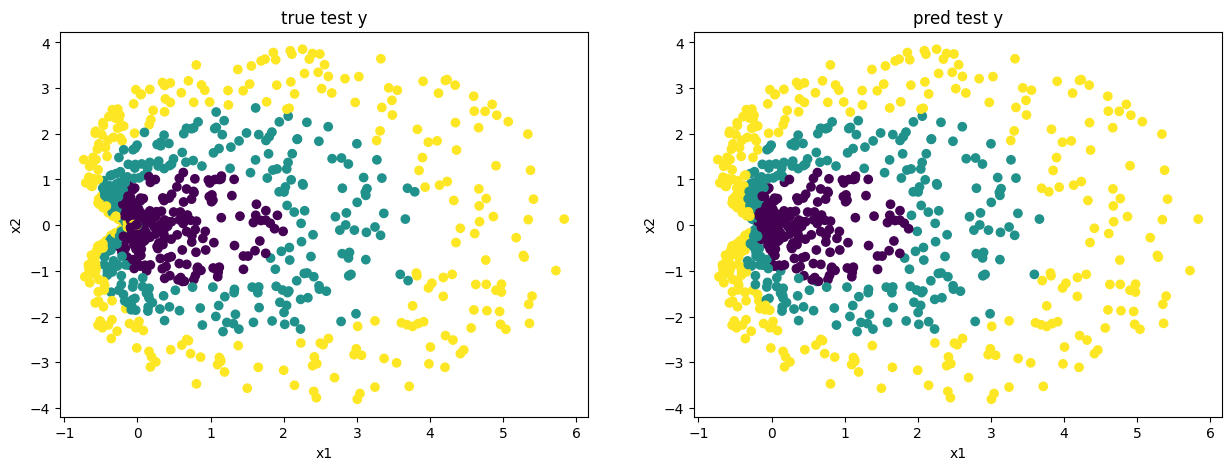

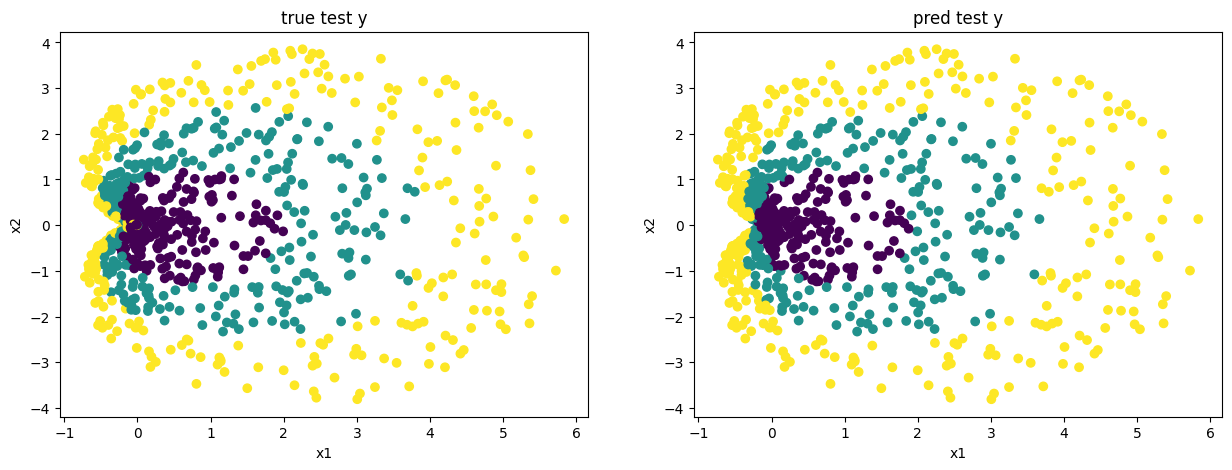

In [57]:
#Train and evauation
import torch.optim as optim
from sklearn.metrics import accuracy_score

model = MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
lr = 0.01
optimizer = optim.SGD(model.parameters(), lr=lr)

train_costs = []
val_costs=[]
acc_scores=[]

epoch = 4000
for i in range(epoch):
    #Train
    model.train()
    optimizer.zero_grad()
    input_x = torch.Tensor(train_X)
    true_y= torch.Tensor(train_y).long()
    pred_y = model.forward(input_x)

    cost = cls_loss(pred_y.squeeze(), true_y)
    cost.backward()
    optimizer.step()
    train_costs.append(cost.item())

    #validation
    model.eval()
    optimizer.zero_grad()
    
    input_x = torch.Tensor(val_X)
    true_y= torch.Tensor(val_y).long()
    pred_y = model.forward(input_x)

    cost = cls_loss(pred_y.squeeze(), true_y)
    val_costs.append(cost.item())

    #evaluation
    if(i%200 == 0):
        #caculate accuracy
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model.forward(input_x).max(dim=1)[1]
        acc = accuracy_score(true_y, pred_y)
        acc_scores.append(acc)

        fig = plt.figure(figsize=(10,5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c = test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('true test y')

        ax2 = fig.add_subplot(1,2,2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c = pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('pred test y')

        plt.show()

print(train_costs, val_costs)

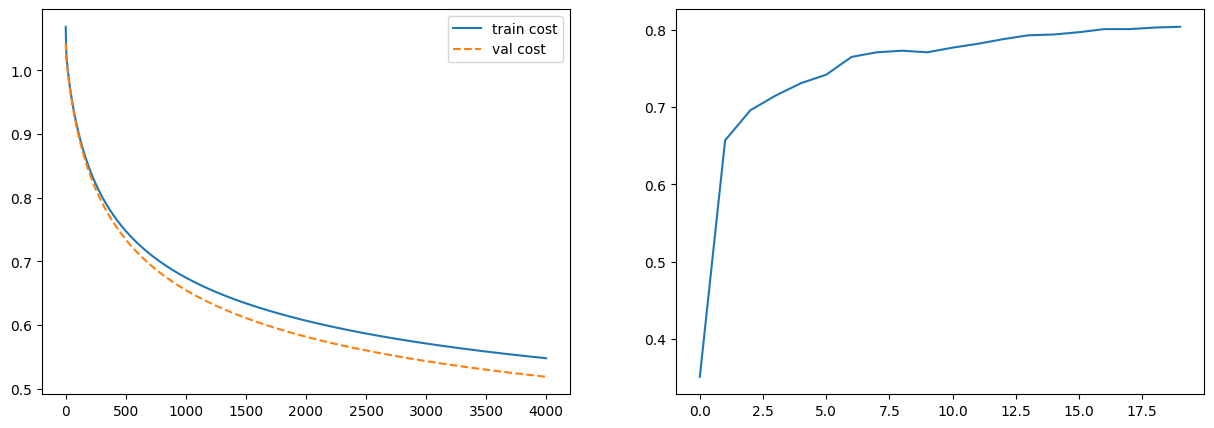

In [46]:
figure = plt.figure(figsize=(15, 5))
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(list(range(len(train_costs))), train_costs, label='train cost')
plot1.plot(list(range(len(val_costs))), val_costs, '--', label='val cost')
plot1.legend()

plot2 = figure.add_subplot(1,2,2)
plot2.plot(list(range(len(acc_scores))), acc_scores)
plt.show()